# Bears

This notebook will use linear regression to predict the age of a bear based on it's features. These features include:
 * head length
 * head width,
 * neck (circumfrence?) 
 * length
 * chest (width?)
 * weight
 
The data used in this notebook can be found https://people.sc.fsu.edu/~jburkardt/datasets/triola/bears.csv 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
from ml.linear import LinearRegressionModel

## Load the csv file and convert age to years

In [2]:
data = pd.read_csv('./ml/datasets/bears.csv')
data['AGE'] /= 12.0
data.head()

,AGE,MONTH,SEX,HEADLEN,HEADWTH,NECK,LENGTH,CHEST,WEIGHT
0,1.583333,7,1,11.0,5.5,16.0,53.0,26.0,80
1,4.583333,7,1,16.5,9.0,28.0,67.5,45.0,344
2,6.750000,9,1,15.5,8.0,31.0,72.0,54.0,416
3,9.583333,7,1,17.0,10.0,31.5,72.0,49.0,348
4,8.666667,8,2,15.5,6.5,22.0,62.0,35.0,166


## Explore the different pairs of features visually to see if we can spot linear relationships between them

[]

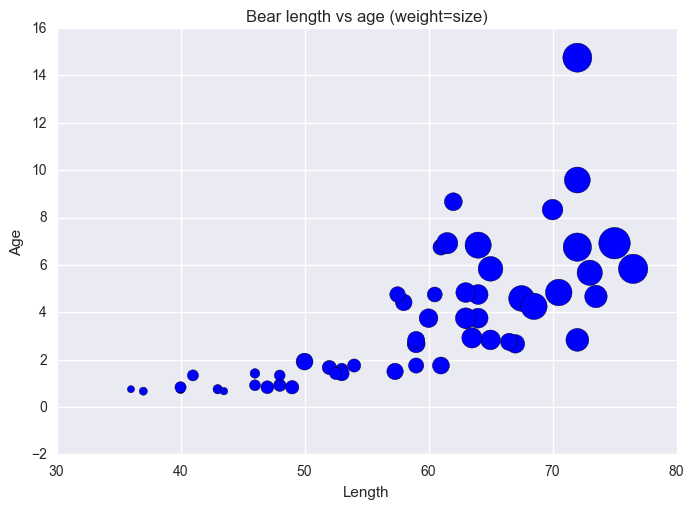

In [3]:
scatter(data['LENGTH'], data['AGE'], s=data['WEIGHT'])
title('Bear length vs age (weight=size)')
xlabel('Length')
ylabel('Age')
plot()

## Visualize all pairs of features

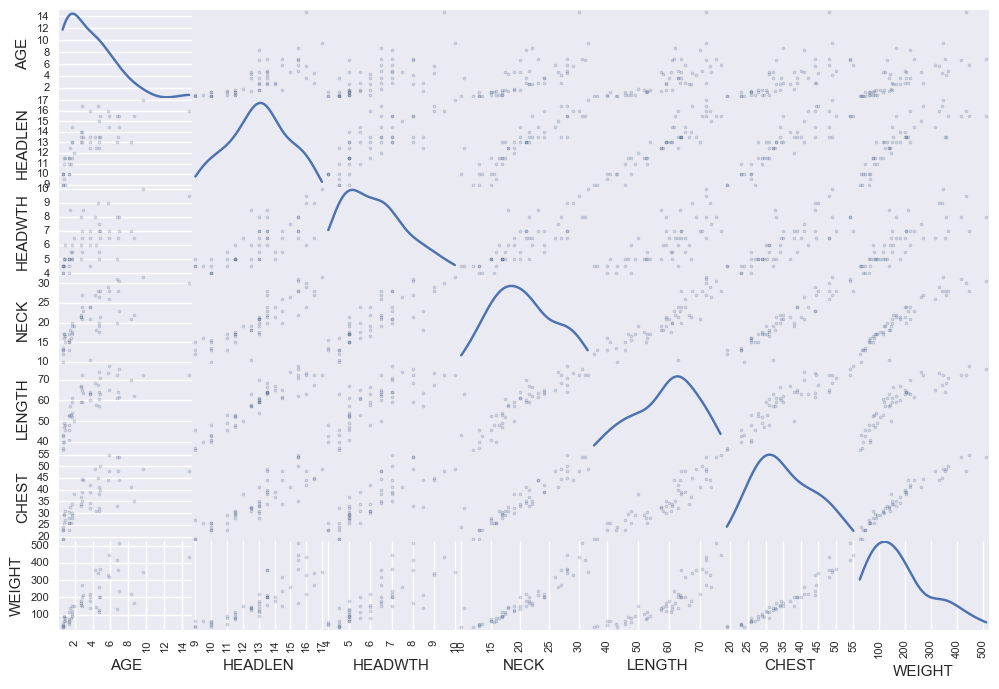

In [4]:
pd.tools.plotting.scatter_matrix(
    data[['AGE', 'HEADLEN', 'HEADWTH', 'NECK', 'LENGTH','CHEST', 'WEIGHT']], 
    figsize=(12, 8), alpha=0.2, diagonal='kde')
show()

## Split the Data Into Training and Test Sets

In [5]:
train = data.sample(frac=0.7, random_state = 4)
test = data.drop(train.index)
test = test.sort_values('WEIGHT')
target = 'AGE'
features = ['HEADLEN', 'HEADWTH', 'NECK', 'LENGTH', 'CHEST', 'WEIGHT']

## Create a Linear Regression Model

In [6]:
model = LinearRegressionModel()
model.optimization.learning_rate = 0.000001
model.optimization.tolerance = 1.0
model.max_iterations = 100
model.learn(train[features].values, train[target].values)

## Visualize Predictions

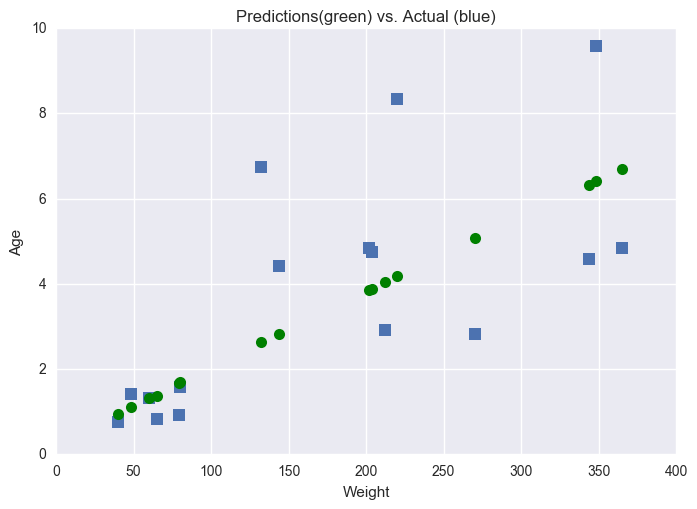

In [7]:
m = test[features].shape[0]
X = np.concatenate((np.ones([m, 1]), test[features].values), axis=1)
predictions = model.predict(X)
title('Predictions(green) vs. Actual (blue)')
ylabel('Age')
xlabel('Weight')
plot(test['WEIGHT'], test['AGE'], 's', test['WEIGHT'], predictions, 'go', markersize=8.0)

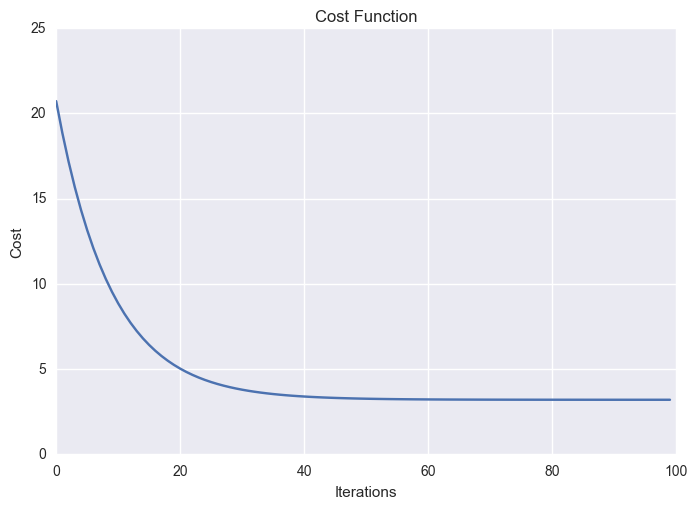

In [8]:
title('Cost Function')
ylabel('Cost')
xlabel('Iterations')
plot(model.cost_over_time)